   # ***Video Game Sales*** 🎮

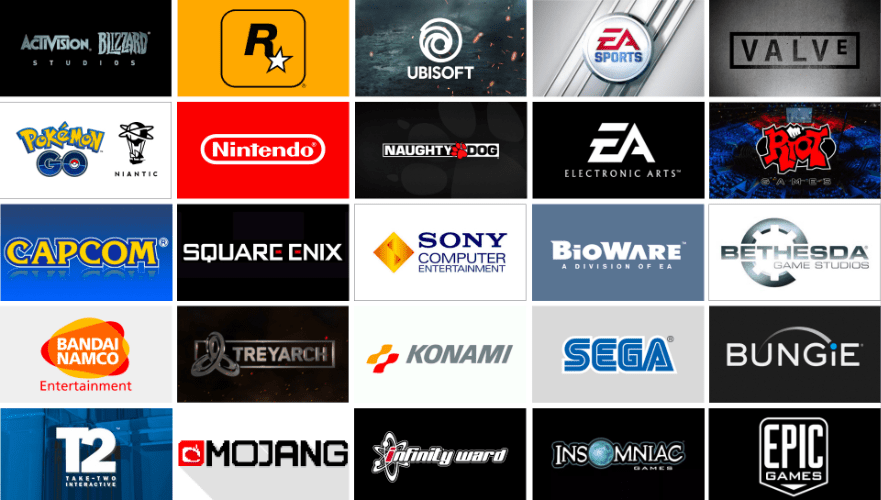


# Definición del objetivo
Con los datos históricos que se posee acerca de los videojuegos, géneros, plataformas y ventas, buscamos obtener indicios que demuestren qué tipos de plataformas serán las más utilizadas a futuro y qué genero tendrá mayor relevancia permitiendo desarrollar nueva información sobre futuras ventas.
# Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales están próximos a simular nuestra realidad, lo cual nos benificiaría a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, diseñar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas más importantes del mundo están en la búsqueda de tecnologías como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma más inmersiva.
# Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y géneros más relevantes de videojuegos.
# Contexto analítico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


### ***Serie de preguntas***

*   ¿Cuál fue la relación entre las ventas en Estados Unidos y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Europa y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Japón y el resto del mundo? 
*   ¿Cuáles son los juegos mas vendidos?
*   ¿Cuáles son los generos mas vendidos? 
*   ¿Cuál fue el formato de consola más utilizado?
*   ¿Cuál fue el desarrollador que obtuvo más ventas? 
*   ¿Cuál fue la evolución entre las plataformas a lo largo de los años? 

# ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [2]:
url='https://raw.githubusercontent.com/leoomc97/datasets/main/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [3]:
vgsales = pd.read_csv(url)

In [4]:
df = pd.DataFrame(vgsales)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.shape

(16598, 11)

# ***EDA - Exploratory Data Analysis 📊***

## ***1) Data Wrangling***

Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

###Borrado de duplicados

In [6]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


###Análisis de nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

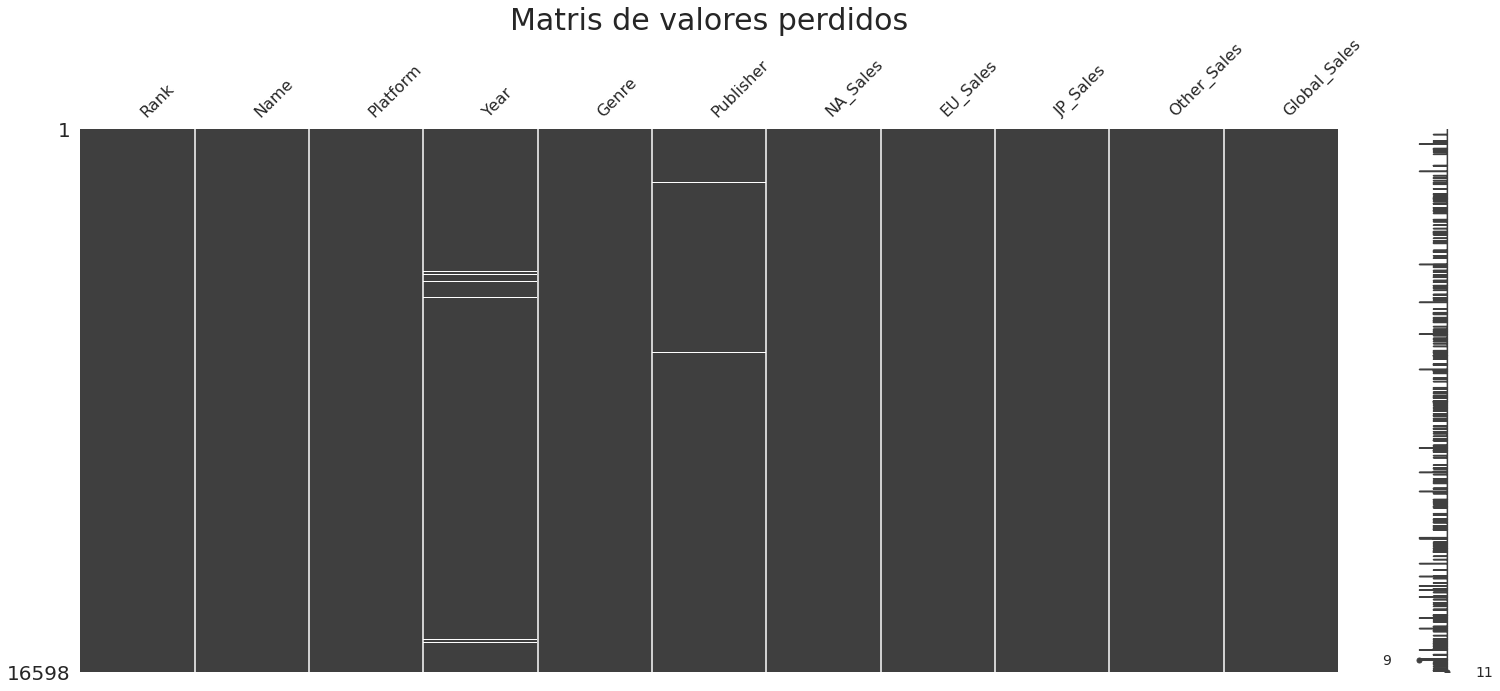

In [8]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
Year,Year,1.632727
Publisher,Publisher,0.349440
Rank,Rank,0.000000
Name,Name,0.000000
Platform,Platform,0.000000
Genre,Genre,0.000000
NA_Sales,NA_Sales,0.000000
EU_Sales,EU_Sales,0.000000
JP_Sales,JP_Sales,0.000000
Other_Sales,Other_Sales,0.000000


<Figure size 1080x360 with 0 Axes>

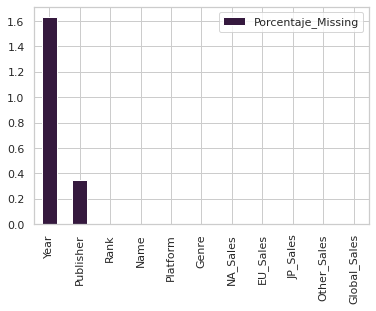

In [11]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro análisis.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [12]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisión: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.

In [13]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

####Llenar con la catergoría "Desconocido"

In [14]:
col_cat=['Publisher'] #Columnas categóricas

#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [15]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [16]:
df = df.dropna(axis=0)

In [17]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

###Transformo el tipo de dato de las columnas

Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.

In [18]:
df["Year"] = df["Year"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Verifico las transformaciones realizadas en el dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


## ***2) Distribución de datos***

Continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis.

In [20]:
df['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Text(0.5, 1.0, 'Boxplot')

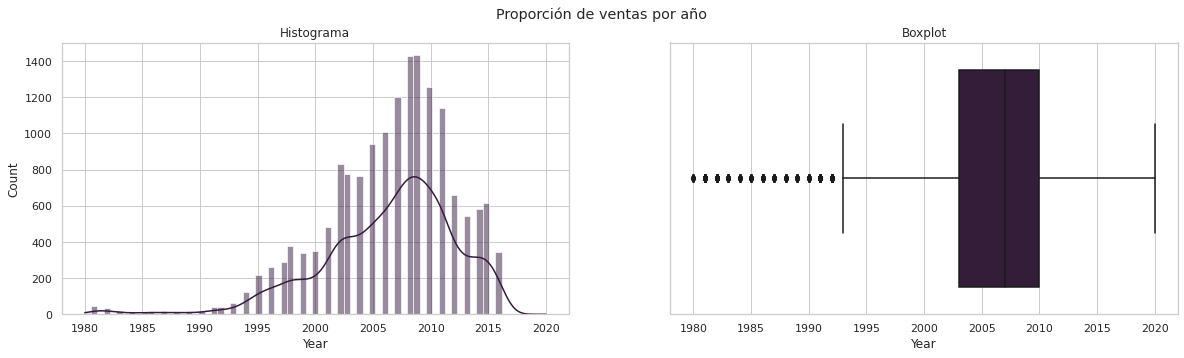

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Proporción de ventas por año')

# Histograma
sns.histplot(ax=axes[0], x = df['Year'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = df['Year'])
axes[1].set_title("Boxplot")


Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

Podemos observar también que tenemos presencia de outliers en los datos pasados, por lo que es necesario realizar un análisis para determinar si dichos datos tendrán un impacto negativo en la obtensión de insights y deberían eliminarse.

## ***3) Correlaciones y dependencias***

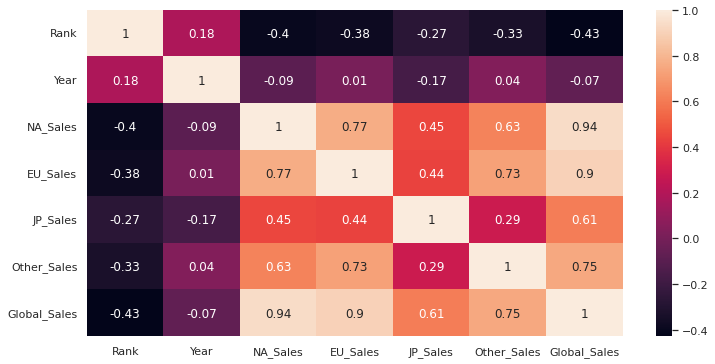

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Estados Unidos, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.94, 0.90 y 0.61 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas propias de Estados Unidos y Europa con respecto a Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones, obteniendo una correlación de 0.45 y 0.44. 

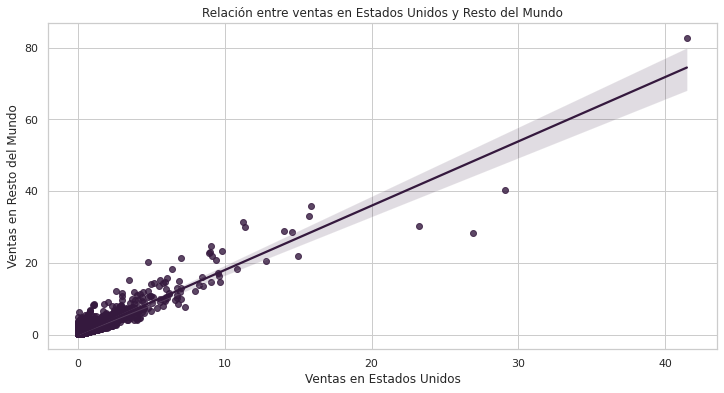

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Estados Unidos y Resto del Mundo')
plt.show()

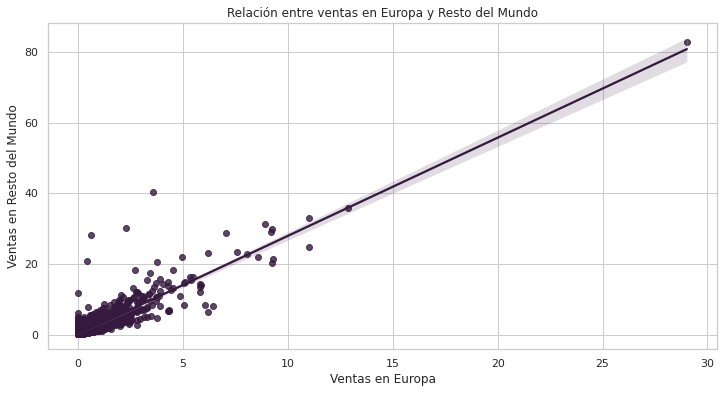

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Europa y Resto del Mundo')
plt.show()

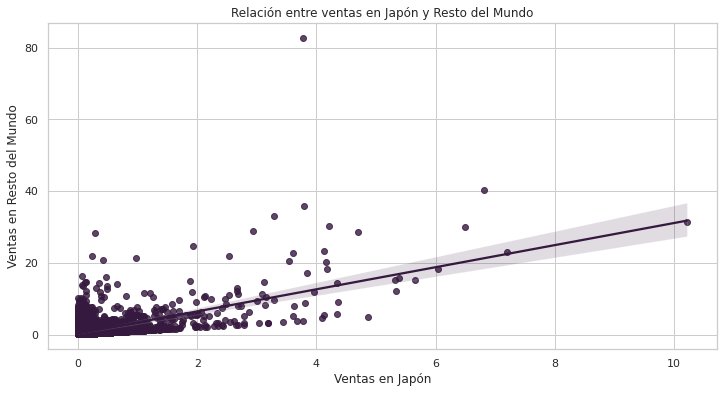

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Japón y Resto del Mundo')
plt.show()

Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones de mayor consumo, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.

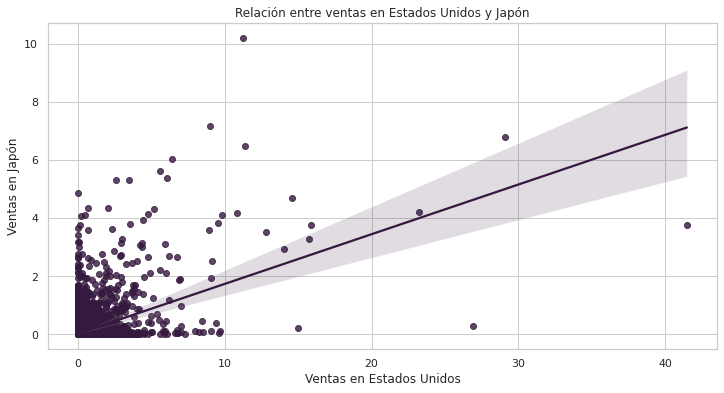

In [26]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Estados Unidos y Japón')
plt.show()

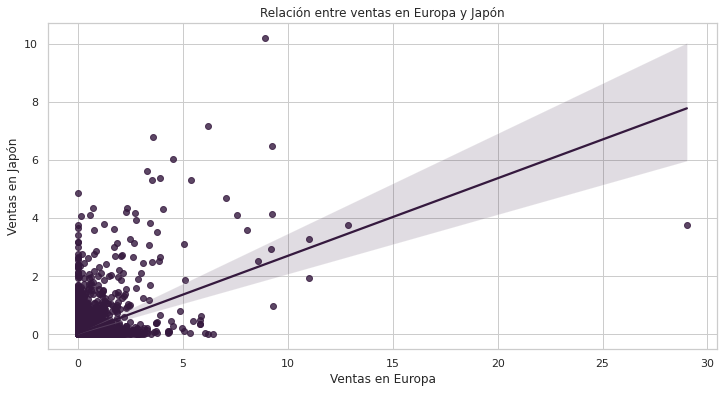

In [27]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Europa y Japón')
plt.show()

Pero si observamos la relación entre las ventas en Estados Unidos y Japón, y las ventas entre Europa y Japón podemos notar una menor correlación, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Europa con respecto a Japón tienen inclinación a distintos géneros y plataformas.

Más adelante podremos graficar y observar qué géneros y plataformas son las que más se consumen en cada región.

## ***4) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

###Análisis descriptivo e inferencial univariado

####Feature: "Platform"

Proporción de plataformas vendidas:

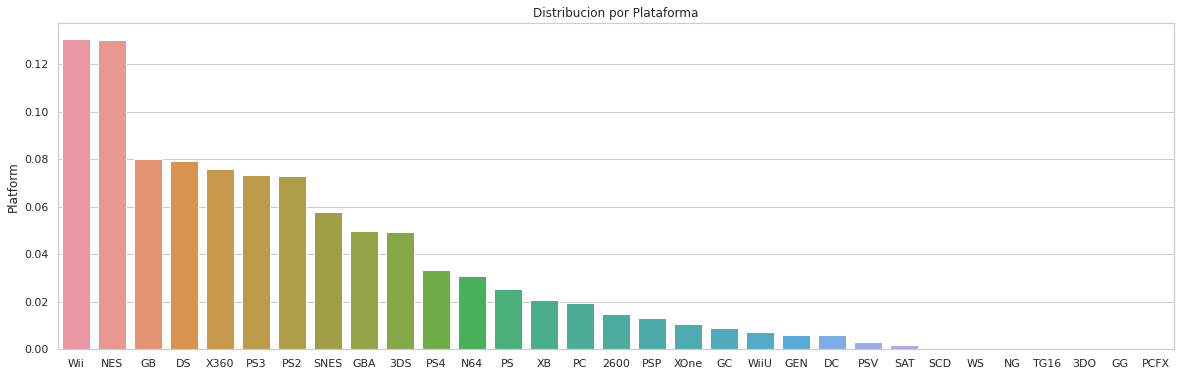

In [28]:
plt.figure(figsize=(20, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar que las plataformas con un porcentaje considerable de ventas a lo largo de la historia fueron aquellas desarrolladas por Nintendo, como la  Nintendo Wii, la Nintendo NES, la GameBoy, la Nintendo DS, seguidas por la XBox 360 desarrollada por Microsoft y las conocidas Playstation 3 y 2 desarrolladas por Sony. 

Podemos notar que la Playstation 4  y la XBox One no presentan un gran porcentaje de ventas comparado con sus antecesores, sin embargo, en llamativo como la Nintendo NES se ha mantenido como un éxito de ventas desde su salida en 1985.

Nintendo NES:

![nintendo](https://media.istockphoto.com/id/458077055/es/foto/nintendo-sistema-de-entretenimiento-con-controlador-y-juego.jpg?s=612x612&w=0&k=20&c=AbKDu6BeiMiWYJPh6sP66aI1ywDQb_k0K9iDh45nNpk=)


####Feature: "Genre"

Proporción de géneros vendidos:

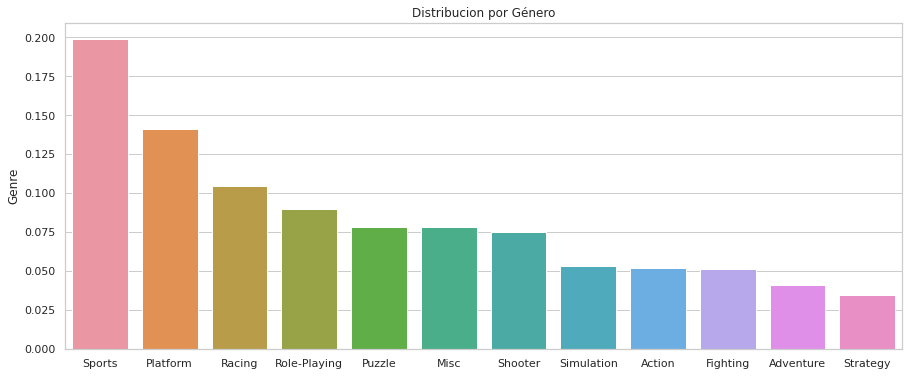

In [29]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Género')
plt.show()

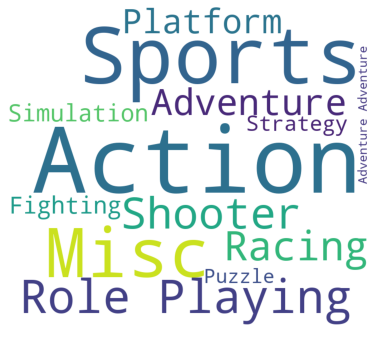

In [30]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Por un lado se puede observar que el género más consumido es el de Deportes alcanzando casi el 20% del mercado, mientras lo siguen los juegos de Plataformas, Carreras y Role-Playing, y en menor medida Puzzle, Shooter, Acción, seguidos para nuestra sorpresa por Sports, Strategy, Adventure, Acción y Estrategia.

Cabe destacar la WordCloud anterior donde se puede indentificar que existe una importante cantidad de juegos de Acción ofrecida en el mercado, sin embargo, apenas logra abarcar el 5% de las ventas.

####Feature: "Publisher"

Proporción de desarrolladores con más ventas:

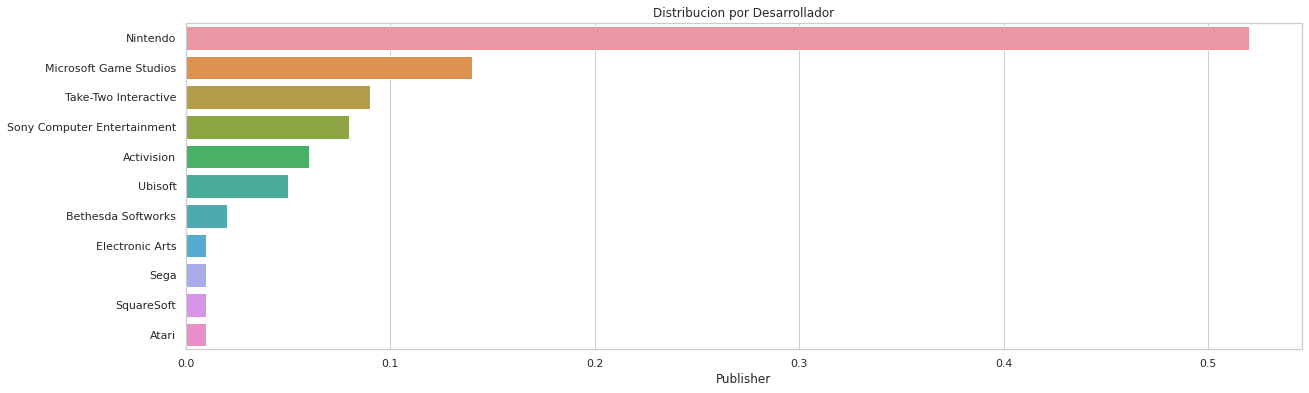

In [31]:
plt.figure(figsize=(20, 6))
x=df.head(100)["Publisher"].unique()
y=df.head(100)["Publisher"].value_counts()/df.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 50% del mercado, seguido de Microsoft Game Studios con el 15% de las ventas, y en menor porcentaje los nuevos desarrolladores de juegos como Activision, Ubisoft y Electronic Arts.

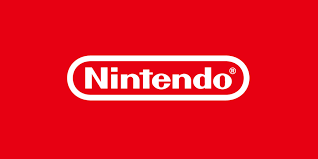







####Evolución de las plataformas en el tiempo

In [ ]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiará el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [ ]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

###Análisis descriptivo e inferencial bivariado

####RECORD DE VENTAS POR REGIÓN:

#####ESTADOS UNIDOS:

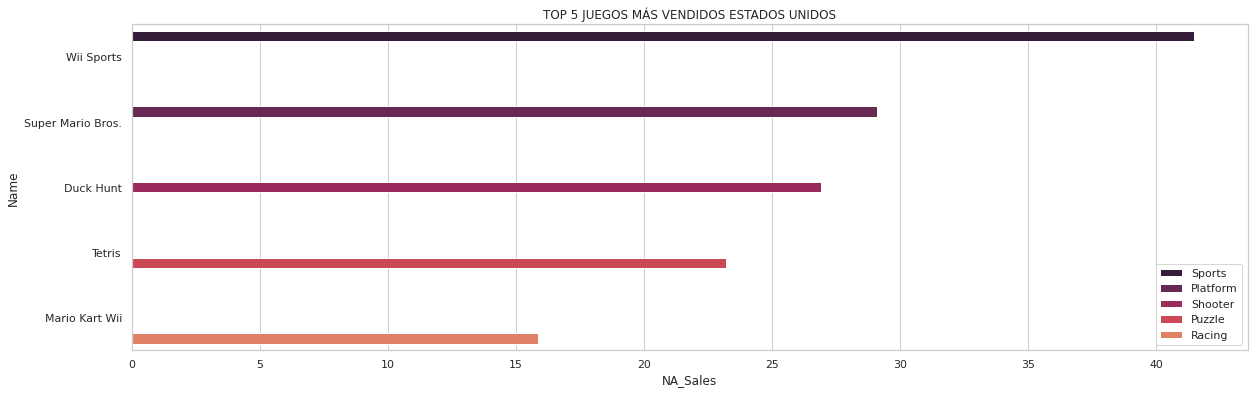

In [121]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

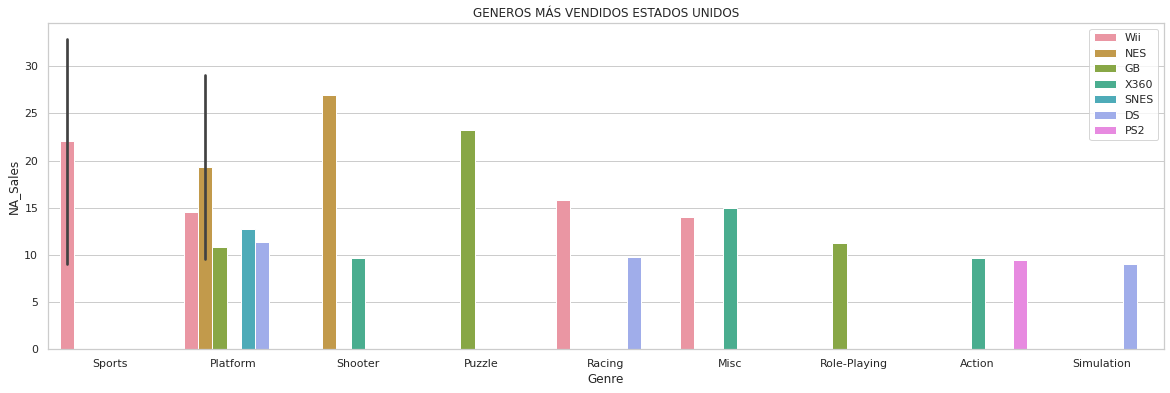

In [122]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

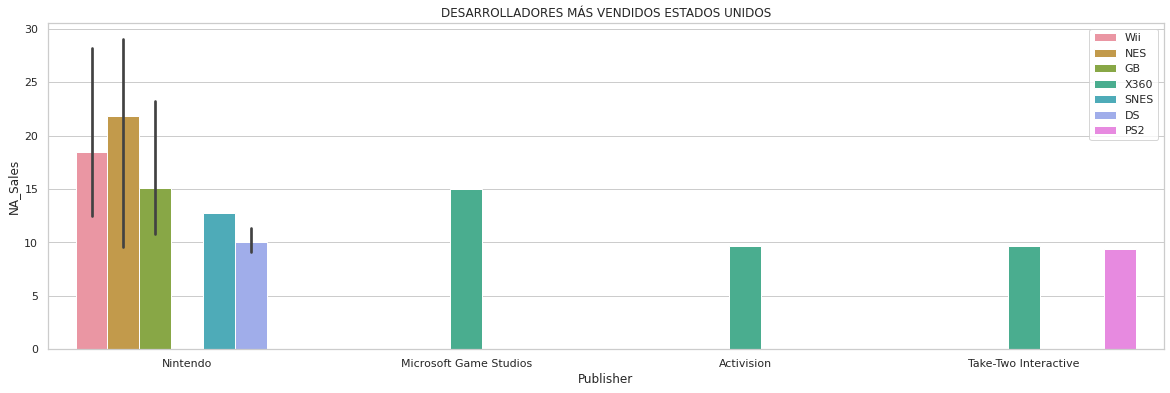

In [127]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

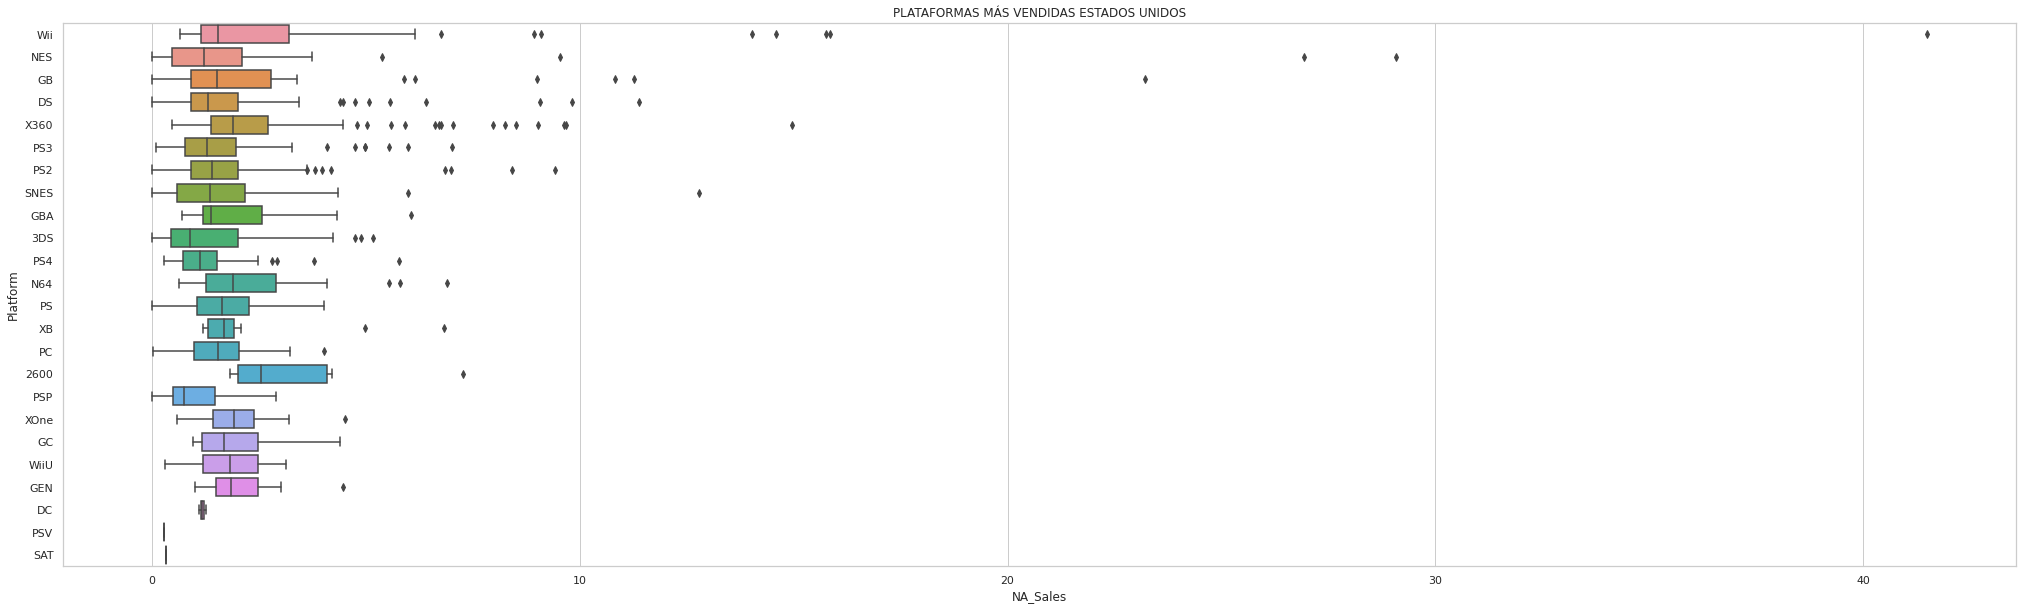

In [129]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'NA_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS UNIDOS')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con más de 40 millones en ventas.

También podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del país producidos por Microsoft Games y Activision, acompañados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de género muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y cómo los juegos de deporte y disparos tienen gran relevancia.

#####JAPÓN:

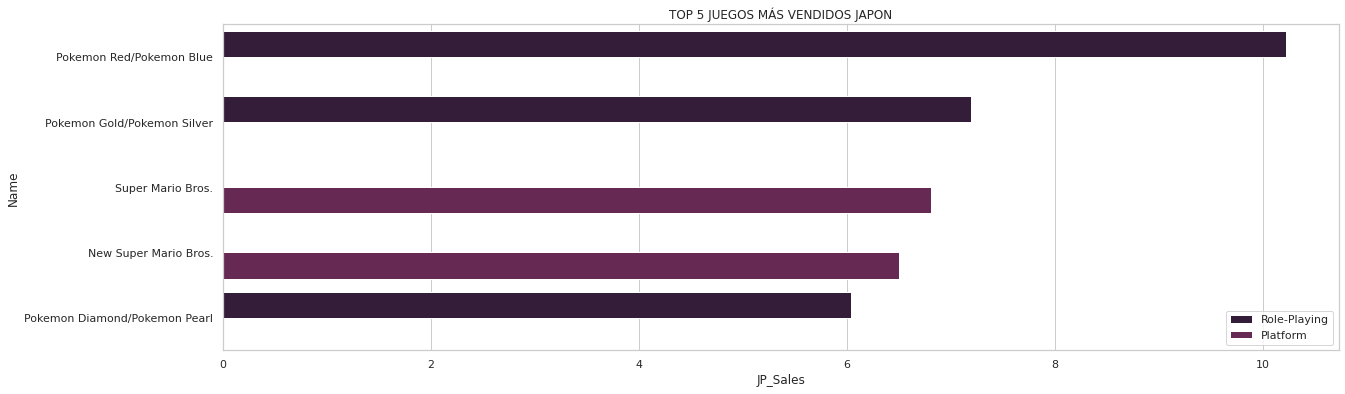

In [130]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS JAPON')
plt.legend()

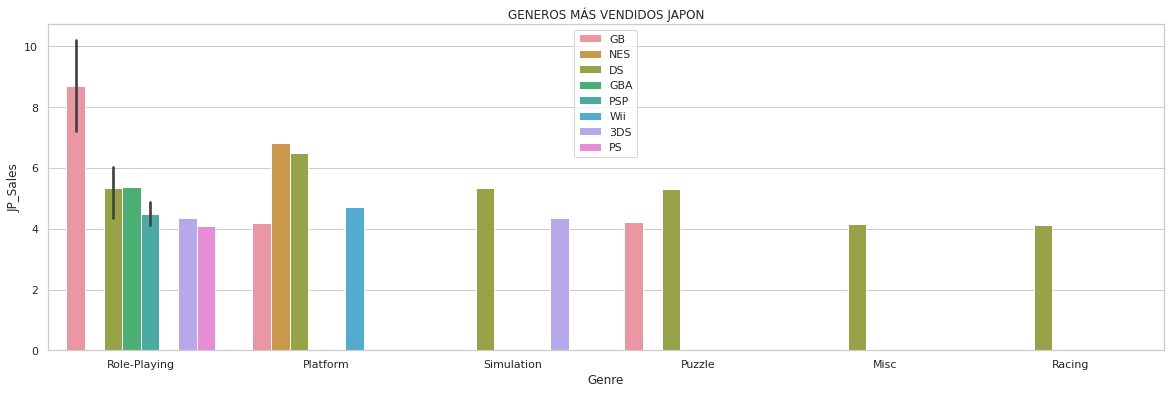

In [131]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS JAPON')
plt.legend()

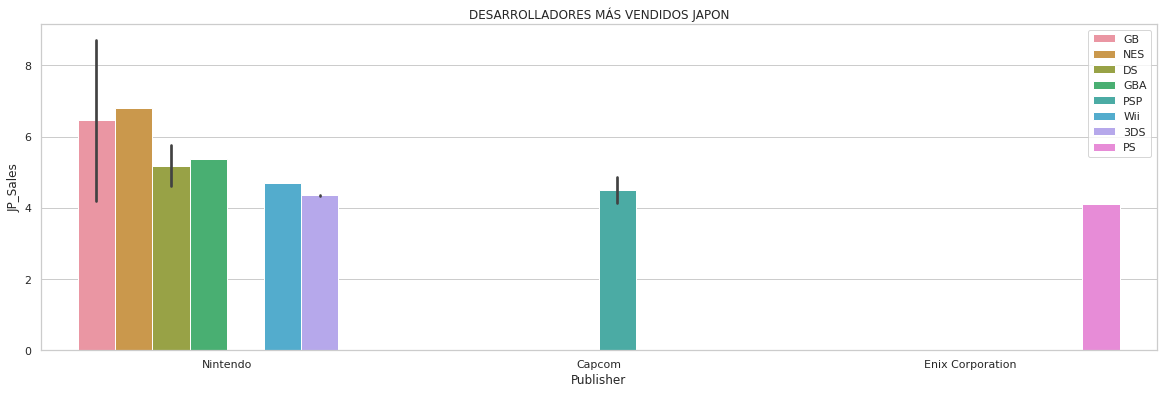

In [132]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS JAPON')
plt.legend()

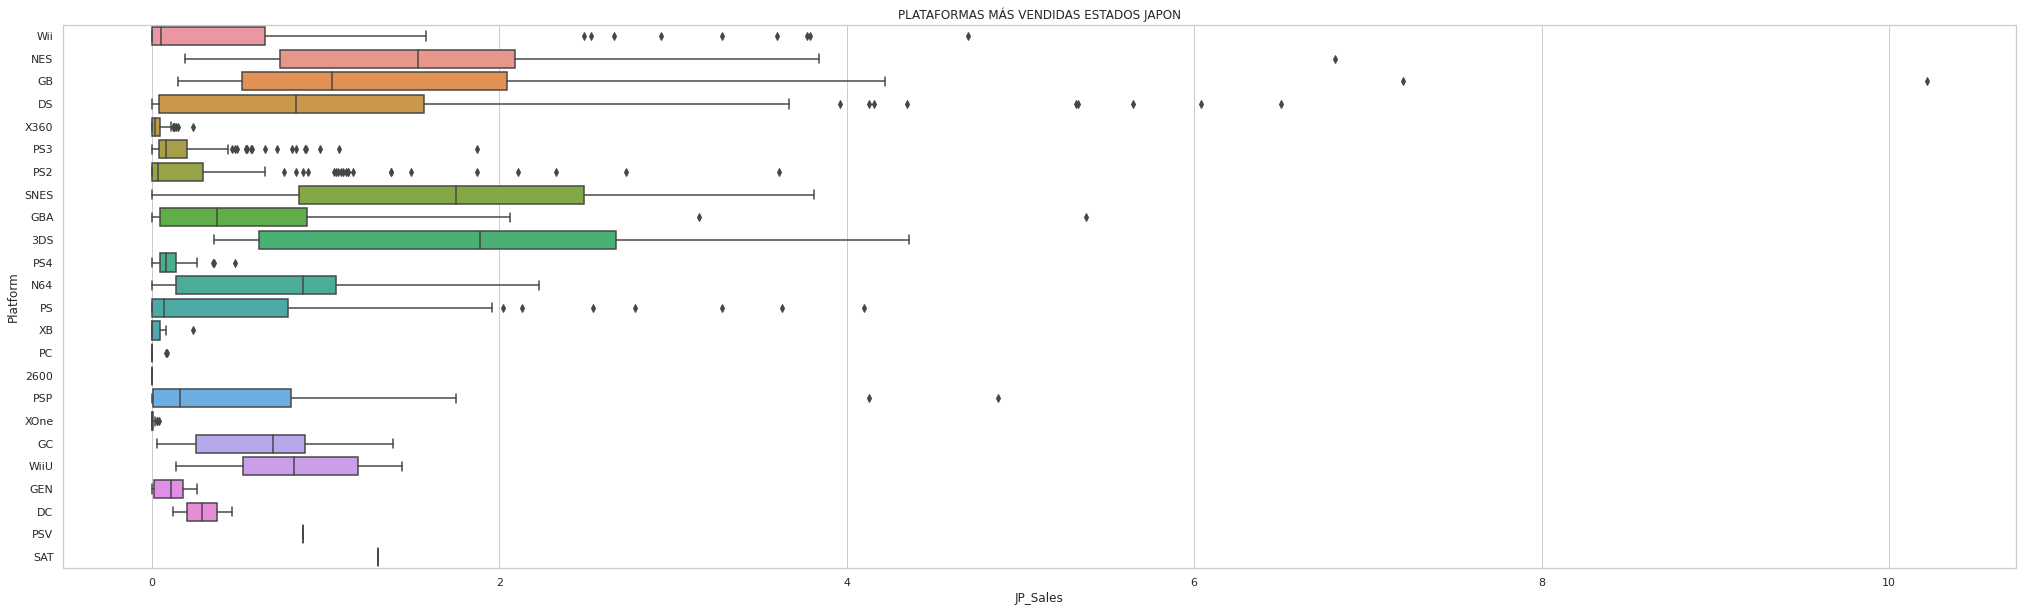

In [133]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'JP_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS JAPON')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Japón se lo lleva el género de Role-Playing o RPG, más precisamente con los juegos Pokemon Red y Pokemos Blue con más de 10 millones en ventas.

También podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del país, producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Japón existe un consumo de juegos de género no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para géneros menos populares como Simulación, Puzzle, Misc y Carreras.

Es interesante ver que en Japón lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de géneros, y cómo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Japón tiene preferencia por plataformas portátiles.

#####EUROPA:

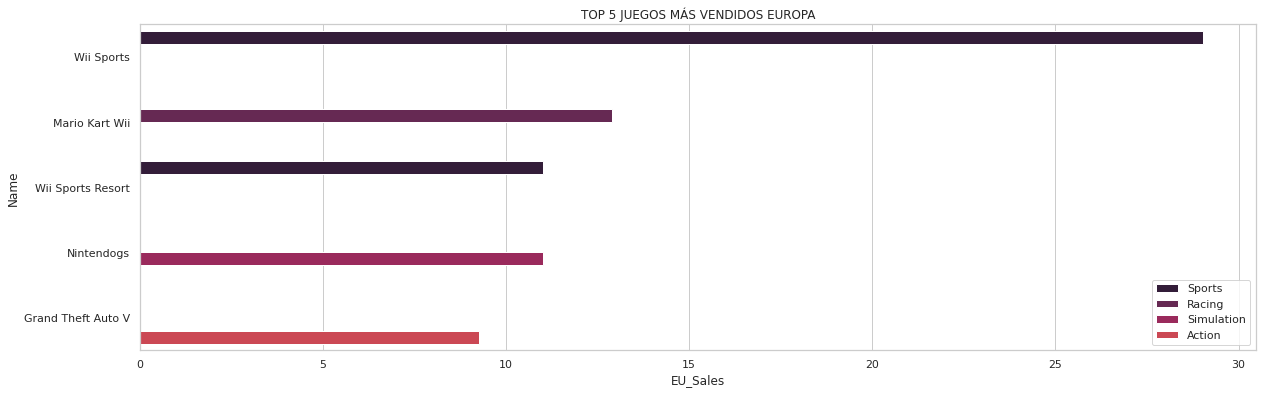

In [137]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS EUROPA')
plt.legend()

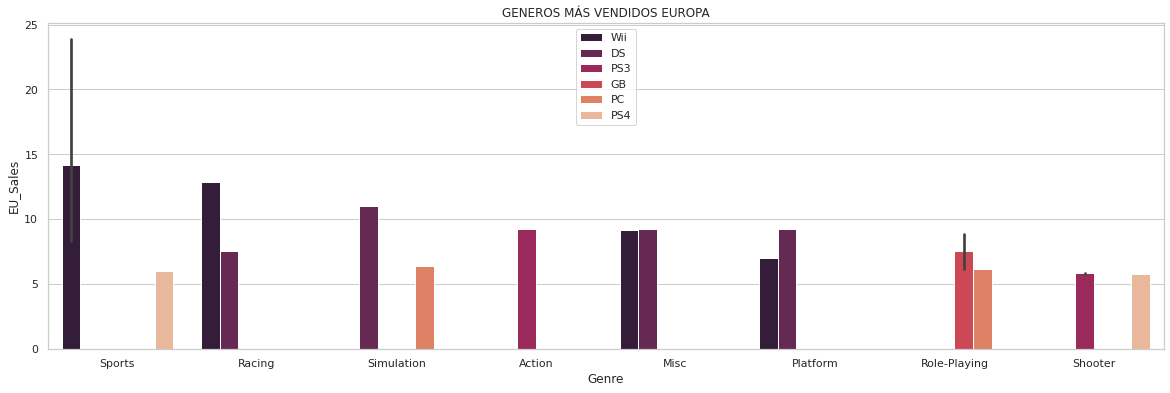

In [136]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS EUROPA')
plt.legend()

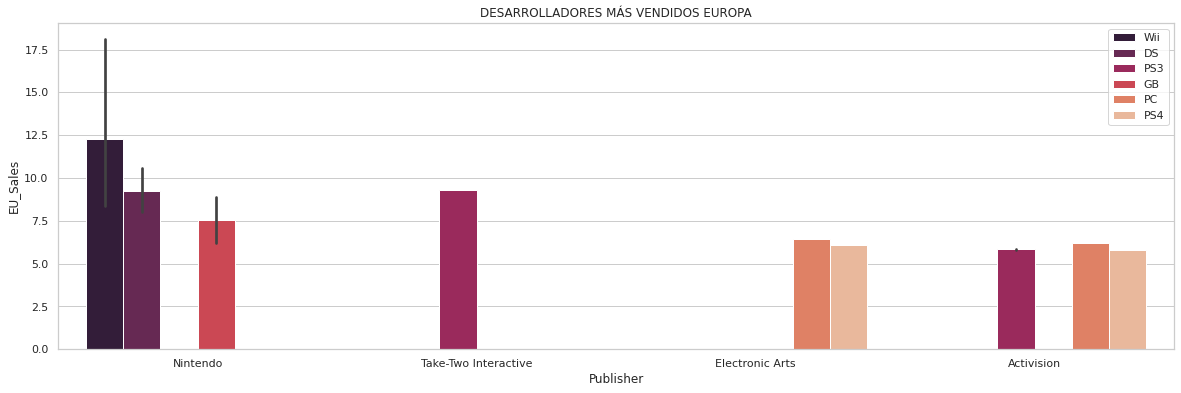

In [135]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS EUROPA')
plt.legend()

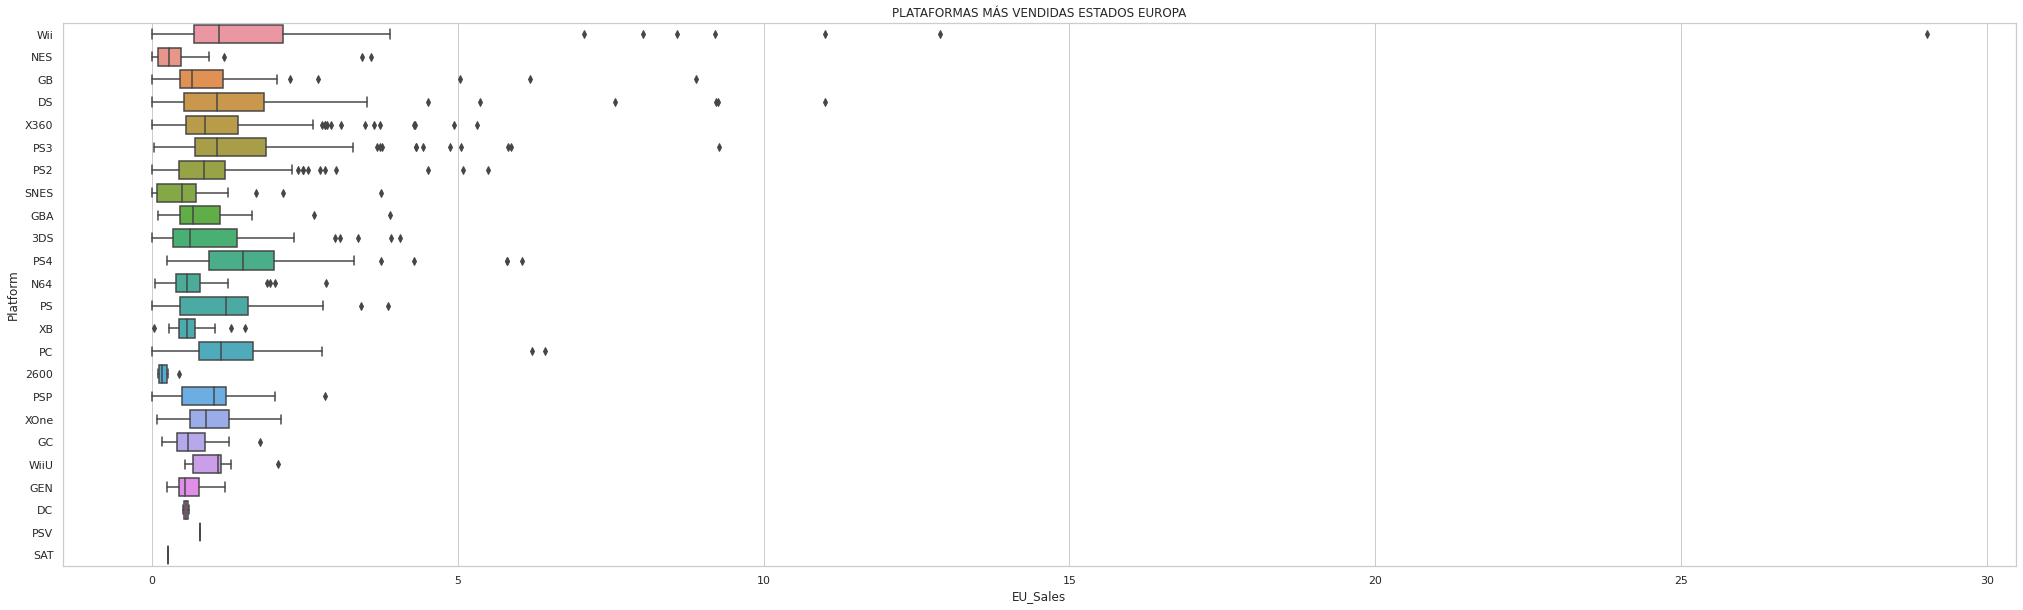

In [134]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'EU_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS EUROPA')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Europa se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con casi 30 millones en ventas.

También podemos observar que los europeos han tenido un consumo muy parecido al de Estados Unidos, con una preferencia a juegos producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores americanos como Electronic Arts y Activision que ya habíamos mencionado anteriormente. 

Finalmente vemos que en Europa existe un consumo bastante parejo de juegos, pero con géneros muy variado, casi como si se aceptara lo mejor de Estados Unidos y lo mejor de Japón, liderando las ventas los juegos de Deportes, Carreras, Simulación y Acción, en donde compiten plataformas como Nintendo y Playstation.
Cabe destacar que ha aparecido la PC como plataforma de juegos, que si bien no ha superado en ventas a la Nintendo o la Playstation, ha permanecido como alternativa a las plataformas antes menciondas, gracias a la posibilidad de permitir jugar juegos de cualquier desarrollador sea de Nintendo, Sony o Microsoft.

Es interesante ver que en Europa lideran los juegos y consolas japoneses, pero a diferencia de Estados Unidos o Japón, los europeos consumen una mayor diversidad de géneros y plataformas, teniendo preferencia por géneros que tengan cierto vínculo con la realidad como Deportes, Carreras y Simulación. 